In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

data = pd.read_csv("postings.csv")
data = data.dropna()
data.drop_duplicates(subset=["Posting"], inplace=True)
data = data.sample(frac=1)
display(data)


,Posting,Label
5,vill du bidra till gott socialt arbete och sam...,Bad
157,northvolt has exciting job offers for a design...,Bad
593,brinner du för att hjälpa andra människor och ...,Bad
547,jo informatik s ger full stack softwareudvikle...,Good
465,vill du hjälpa hälso och sjukvården bli världs...,Good
...,...,...
436,på fra arbetar vi med något som ingen annan gö...,Good
234,dina arbetsuppgifter södra cell värö har under...,Good
221,vi behöver förstärka och vidareutveckla vår ko...,Good
517,vill du vara med och göra skillnad paf skiljer...,Good


Naive Bayes Accuracy: 0.5565217391304348
Random Forest Accuracy: 0.6956521739130435


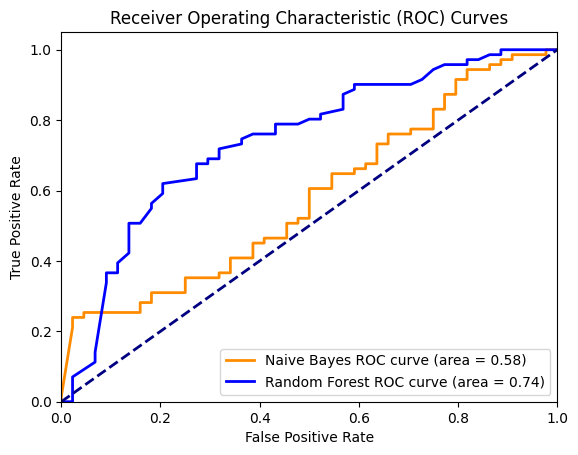

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt

x = data["Posting"]
y = data["Label"]

# Convert labels to binary values (0 and 1)
y_binary = [1 if label == 'Good' else 0 for label in y]

x_train, x_test, y_train, y_test = train_test_split(x, y_binary, test_size=0.2, shuffle=False)

tfid_converter = TfidfVectorizer(max_features=10)

x_train_tfid = tfid_converter.fit_transform(x_train).toarray()
x_train_tfid_df = pd.DataFrame(x_train_tfid)

x_test_tfid = tfid_converter.transform(x_test).toarray()
x_test_tfid_df = pd.DataFrame(x_test_tfid)

nb_model = GaussianNB()
nb_model.fit(x_train_tfid_df, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_tfid_df, y_train)

y_pred_nb = nb_model.predict(x_test_tfid_df)
y_pred_rf = rf_model.predict(x_test_tfid_df)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Naive Bayes Accuracy:", accuracy_nb)
print("Random Forest Accuracy:", accuracy_rf)

y_pred_prob_nb = nb_model.predict_proba(x_test_tfid_df)[:, 1]
y_pred_prob_rf = rf_model.predict_proba(x_test_tfid_df)[:, 1]

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_prob_nb)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Plot ROC curves for both models
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='Naive Bayes ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()



# single_x = ["sök jobbet som elektriker på xlnt talent för att jobba som elektriker! pratar du flytande svenska & vill jobba som elektriker? sök jobbet nu! när du har sökt jobbet sms:ar xlnt talent dig dagen efter för att boka en telefonintervju svara i tid till telefonintervjun för att få jobbet & jobba som elektriker sök nu! erbjuds:∙ fast grundlön∙ friskvård försäkring & pension∙ support & utvecklingkrav:∙ flytande svenska i tal & skrift∙ körkort∙ erfarenhet som elektriker"]
# single_x_tfid_df = tfid_converter.fit_transform(single_x).toarray()
# single_x_tfid_df = pd.DataFrame(single_x_tfid_df)
# single_pred = model.predict(single_x_tfid_df)

# print(single_pred)